<a href="https://colab.research.google.com/github/Sugar1307/azure-openai-test/blob/main/analysis_test3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install japanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 34.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=fed54dae306199adf52534336794fb5b07aee3a0105a9730e0f199ec72431de5
  Stored in directory: /root/.cache/pip/wheels/c1/f7/9b/418f19a7b9340fc16e071e89efc379aca68d40238b258df53d
Successfully built japanize-matplotlib


In [2]:
#必要なパッケージのimport
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# 日本語フォントの設定
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False


In [4]:
# ========================================
# 1. データの読み込みと前処理
# ========================================

# CSVファイルをアップロード（Google Colabの場合）
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/thesis/analysis_combined_all_songs.csv')

print("データの基本情報:")
print(f"行数: {len(df)}")
print(f"列数: {len(df.columns)}")
print("\n最初の5行:")
print(df.head())

Mounted at /content/drive
データの基本情報:
行数: 1280
列数: 15

最初の5行:
   Line No.  BLEU_GPT  BLEU_Gemini  BLEU_YouTube Auto Subtitle  \
0         1  1.000000     1.000000                    1.000000   
1         2  0.092077     0.624020                    0.367415   
2         3  0.097177     0.037593                    0.071227   
3         4  0.000000     0.000000                    0.168219   
4         5  0.037593     0.000000                    0.000000   

   BLEU_YouTube Japanese Subtitle  BERT_GPT  BERT_Gemini  \
0                        1.000000  1.000000     1.000000   
1                        0.182452  0.907713     0.950326   
2                        0.081939  0.951930     0.934590   
3                        0.121211  0.961088     0.940088   
4                        0.037375  0.931679     0.919488   

   BERT_YouTube Auto Subtitle  BERT_YouTube Japanese Subtitle  As it was  \
0                    1.000000                        1.000000          1   
1                    0.934797 

In [5]:
# ========================================
# 2. 翻訳手法ごとのデータフレーム構築
# ========================================

# 各翻訳手法のメトリクスとカテゴリを定義
translation_methods = ['GPT', 'Gemini', 'YouTube Auto Subtitle', 'YouTube Japanese Subtitle']

# 各手法ごとのデータフレームを作成
method_dataframes = {}

for method in translation_methods:
    # 該当する列を抽出
    bleu_col = f'BLEU_{method}'
    bert_col = f'BERT_{method}'

    # 新しいデータフレームを作成
    method_df = pd.DataFrame({
        'Line_No': df['Line No.'],
        'BLEU': df[bleu_col],
        'BERT': df[bert_col],
        'As_it_was': df['As it was'],
        'Literal_translation': df['Literal translation'],
        'Omission': df['Omission'],
        'Addition': df['Addition'],
        'Replacement': df['Replacement'],
        'Song_Name': df['Song_Name']
    })

    method_dataframes[method] = method_df

    print(f"\n{'='*50}")
    print(f"{method} のデータフレーム:")
    print(f"{'='*50}")
    print(method_df.describe())


GPT のデータフレーム:
           Line_No         BLEU         BERT    As_it_was  \
count  1280.000000  1280.000000  1280.000000  1280.000000   
mean     32.247656     0.523712     0.961135     0.385937   
std      19.758046     0.413341     0.037829     0.487006   
min       1.000000     0.000000     0.838784     0.000000   
25%      16.000000     0.097177     0.932398     0.000000   
50%      31.000000     0.500000     0.961575     0.000000   
75%      47.000000     1.000000     1.000000     1.000000   
max      90.000000     1.000000     1.000000     1.000000   

       Literal_translation     Omission    Addition  Replacement  
count          1280.000000  1280.000000  1280.00000  1280.000000  
mean              0.222656     0.287500     0.00625     0.097656  
std               0.416192     0.452774     0.07884     0.296965  
min               0.000000     0.000000     0.00000     0.000000  
25%               0.000000     0.000000     0.00000     0.000000  
50%               0.000000     0.

In [6]:
# ========================================
# 3. 基本統計分析関数
# ========================================

def analyze_method(method_name, df):
    """各翻訳手法の基本統計を分析"""

    print(f"\n{'='*60}")
    print(f"{method_name} の詳細分析")
    print(f"{'='*60}")

    # 1. BLEU/BERTスコアの基本統計
    print("\n■ BLEU/BERTスコアの統計:")
    print(f"BLEU平均: {df['BLEU'].mean():.4f} (標準偏差: {df['BLEU'].std():.4f})")
    print(f"BERT平均: {df['BERT'].mean():.4f} (標準偏差: {df['BERT'].std():.4f})")
    print(f"BLEU中央値: {df['BLEU'].median():.4f}")
    print(f"BERT中央値: {df['BERT'].median():.4f}")

    # 2. 翻訳戦略の分布
    print("\n■ 翻訳戦略の使用頻度:")
    strategy_counts = {
        'As it was': df['As_it_was'].sum(),
        'Literal translation': df['Literal_translation'].sum(),
        'Omission': df['Omission'].sum(),
        'Addition': df['Addition'].sum(),
        'Replacement': df['Replacement'].sum()
    }
    for strategy, count in strategy_counts.items():
        percentage = (count / len(df)) * 100
        print(f"{strategy}: {count}行 ({percentage:.1f}%)")

    # 3. 翻訳戦略別のスコア
    print("\n■ 翻訳戦略別の平均スコア:")
    strategies = ['As_it_was', 'Literal_translation', 'Omission', 'Addition', 'Replacement']

    for strategy in strategies:
        strategy_data = df[df[strategy] == 1]
        if len(strategy_data) > 0:
            bleu_mean = strategy_data['BLEU'].mean()
            bert_mean = strategy_data['BERT'].mean()
            print(f"{strategy}: BLEU={bleu_mean:.4f}, BERT={bert_mean:.4f} (n={len(strategy_data)})")

    # 4. 曲別の統計
    print("\n■ 曲別の平均スコア (上位5曲):")
    song_stats = df.groupby('Song_Name').agg({
        'BLEU': 'mean',
        'BERT': 'mean'
    }).sort_values('BERT', ascending=False).head()
    print(song_stats)

    return strategy_counts

# 各手法を分析
all_strategy_counts = {}
for method, df in method_dataframes.items():
    all_strategy_counts[method] = analyze_method(method, df)


GPT の詳細分析

■ BLEU/BERTスコアの統計:
BLEU平均: 0.5237 (標準偏差: 0.4133)
BERT平均: 0.9611 (標準偏差: 0.0378)
BLEU中央値: 0.5000
BERT中央値: 0.9616

■ 翻訳戦略の使用頻度:
As it was: 494行 (38.6%)
Literal translation: 285行 (22.3%)
Omission: 368行 (28.7%)
Addition: 8行 (0.6%)
Replacement: 125行 (9.8%)

■ 翻訳戦略別の平均スコア:
As_it_was: BLEU=0.9673, BERT=0.9979 (n=494)
Literal_translation: BLEU=0.2964, BERT=0.9499 (n=285)
Omission: BLEU=0.2048, BERT=0.9337 (n=368)
Addition: BLEU=0.1320, BERT=0.9050 (n=8)
Replacement: BLEU=0.2530, BERT=0.9261 (n=125)

■ 曲別の平均スコア (上位5曲):
                     BLEU      BERT
Song_Name                          
CRAZY            0.740582  0.982401
0X1=LOVESONG     0.603869  0.978216
FEARLESS         0.708176  0.977180
Bite Me          0.660146  0.973444
Sugar Rush Ride  0.606852  0.967591

Gemini の詳細分析

■ BLEU/BERTスコアの統計:
BLEU平均: 0.4980 (標準偏差: 0.4233)
BERT平均: 0.9522 (標準偏差: 0.0449)
BLEU中央値: 0.4336
BERT中央値: 0.9482

■ 翻訳戦略の使用頻度:
As it was: 494行 (38.6%)
Literal translation: 285行 (22.3%)
Omission: 368行 (28.7%)


In [7]:
# ========================================
# 4. 比較分析
# ========================================

print("\n" + "="*60)
print("翻訳手法間の比較分析")
print("="*60)

# 全手法のBLEU/BERTスコアを比較
comparison_data = []
for method, df in method_dataframes.items():
    comparison_data.append({
        'Method': method,
        'BLEU_mean': df['BLEU'].mean(),
        'BLEU_std': df['BLEU'].std(),
        'BERT_mean': df['BERT'].mean(),
        'BERT_std': df['BERT'].std()
    })

comparison_df = pd.DataFrame(comparison_data)
print("\n■ 翻訳手法別スコア比較:")
print(comparison_df.to_string(index=False))


翻訳手法間の比較分析

■ 翻訳手法別スコア比較:
                   Method  BLEU_mean  BLEU_std  BERT_mean  BERT_std
                      GPT   0.523712  0.413341   0.961135  0.037829
                   Gemini   0.497993  0.423292   0.952229  0.044868
    YouTube Auto Subtitle   0.500428  0.423233   0.954489  0.044400
YouTube Japanese Subtitle   0.531060  0.414700   0.960388  0.041067


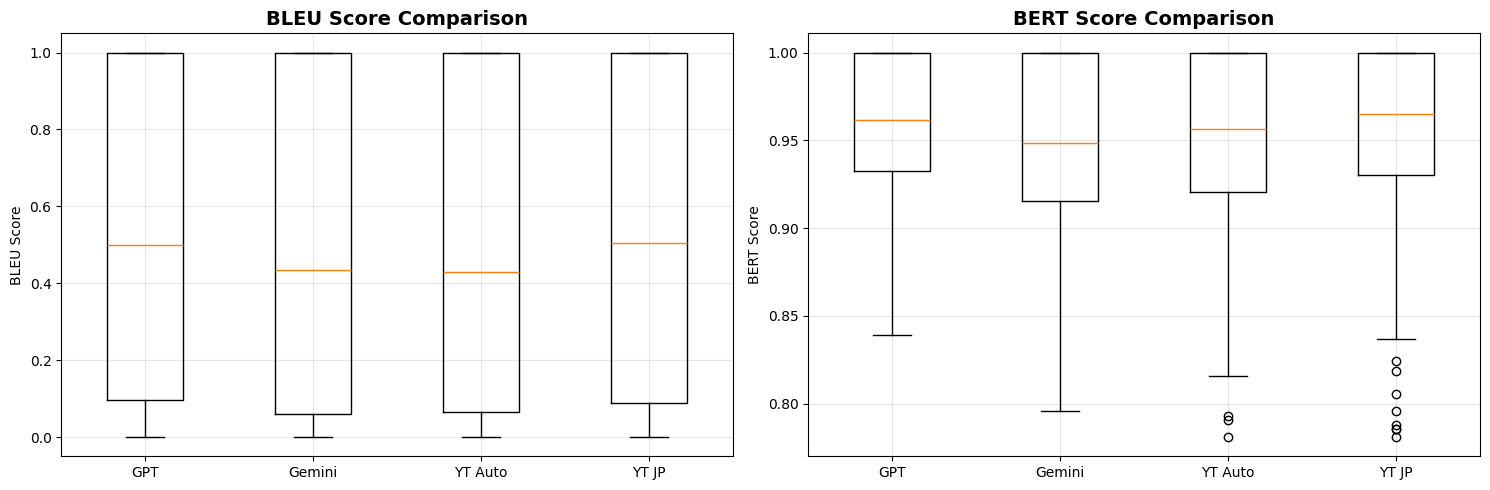

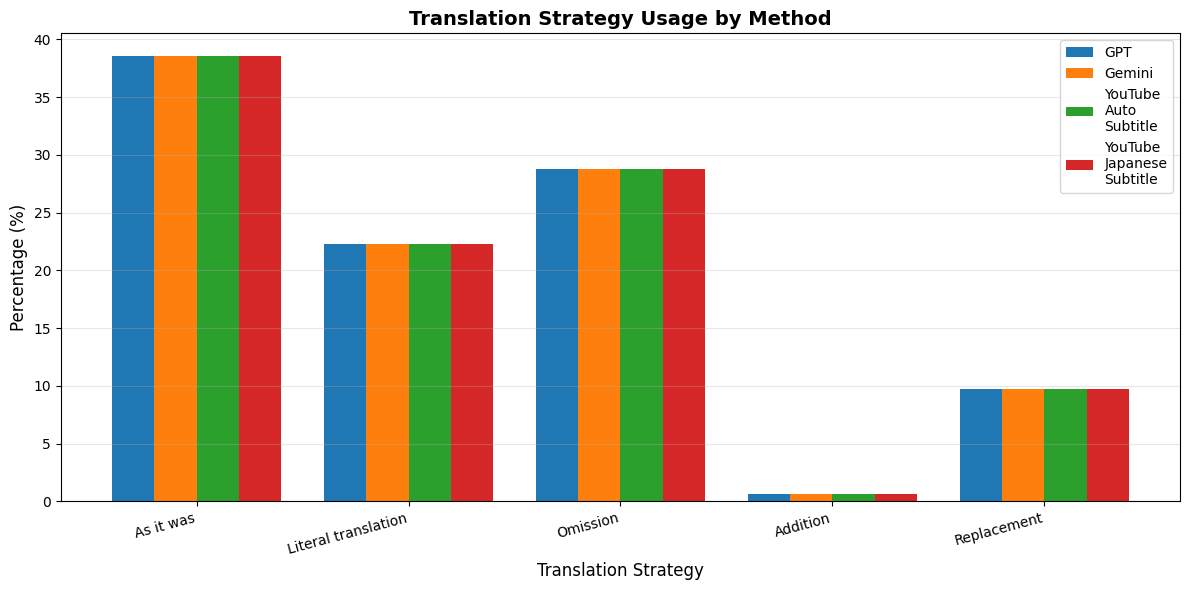

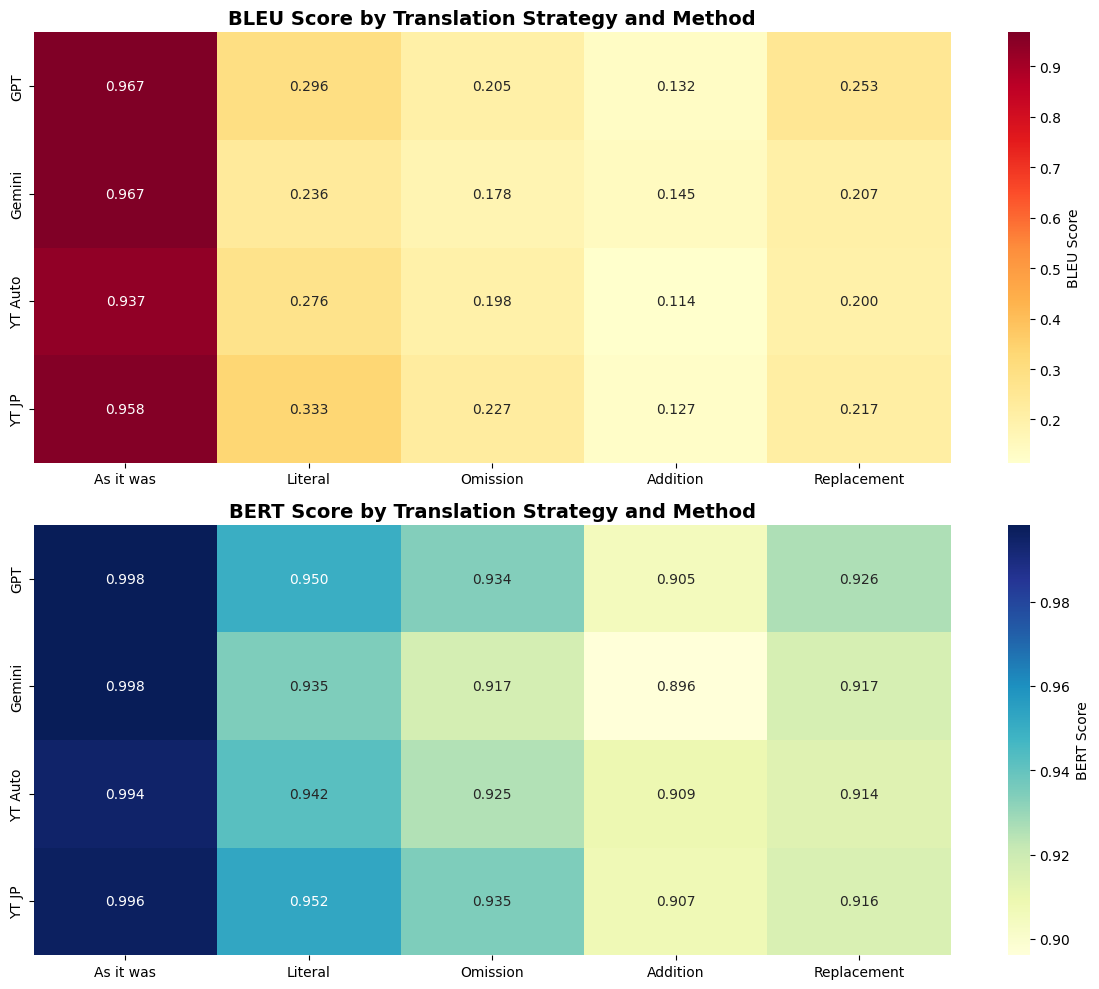


散布図の分散と信頼性検定

■ GPT の信頼性分析:
  サンプルサイズ: 1280
  Pearson相関係数: r=0.8001, p=5.8293e-286 ***
  決定係数: R²=0.6402 (64.0% の分散を説明)
  Spearman順位相関: ρ=0.8264, p=4.4861e-321
  回帰式: BERT = 0.0732 × BLEU + 0.9228
  残差標準偏差: 0.0227
  残差の正規性(Shapiro-Wilk): W=0.8912, p=4.0382e-29 非正規
  分散の均一性(Levene): F=367.1473, p=1.0806e-126 不均一
  外れ値: 1個 (0.1%)
  BLEU分散: 0.1709
  BERT分散: 0.0014
  分散比(BLEU/BERT): 119.3868
  📊 信頼性スコア: 7/12 (58.3%)
  ⚠️  評価: 中程度の信頼性 - 注意して解釈する必要があります

■ Gemini の信頼性分析:
  サンプルサイズ: 1280
  Pearson相関係数: r=0.8287, p=0.0000e+00 ***
  決定係数: R²=0.6868 (68.7% の分散を説明)
  Spearman順位相関: ρ=0.8363, p=0.0000e+00
  回帰式: BERT = 0.0878 × BLEU + 0.9085
  残差標準偏差: 0.0251
  残差の正規性(Shapiro-Wilk): W=0.9176, p=7.8706e-26 非正規
  分散の均一性(Levene): F=384.2542, p=2.2713e-131 不均一
  外れ値: 1個 (0.1%)
  BLEU分散: 0.1792
  BERT分散: 0.0020
  分散比(BLEU/BERT): 89.0015
  📊 信頼性スコア: 7/12 (58.3%)
  ⚠️  評価: 中程度の信頼性 - 注意して解釈する必要があります

■ YouTube Auto Subtitle の信頼性分析:
  サンプルサイズ: 1280
  Pearson相関係数: r=0.7901, p=5.6640e-274 ***
  決定係数: R²=0.624

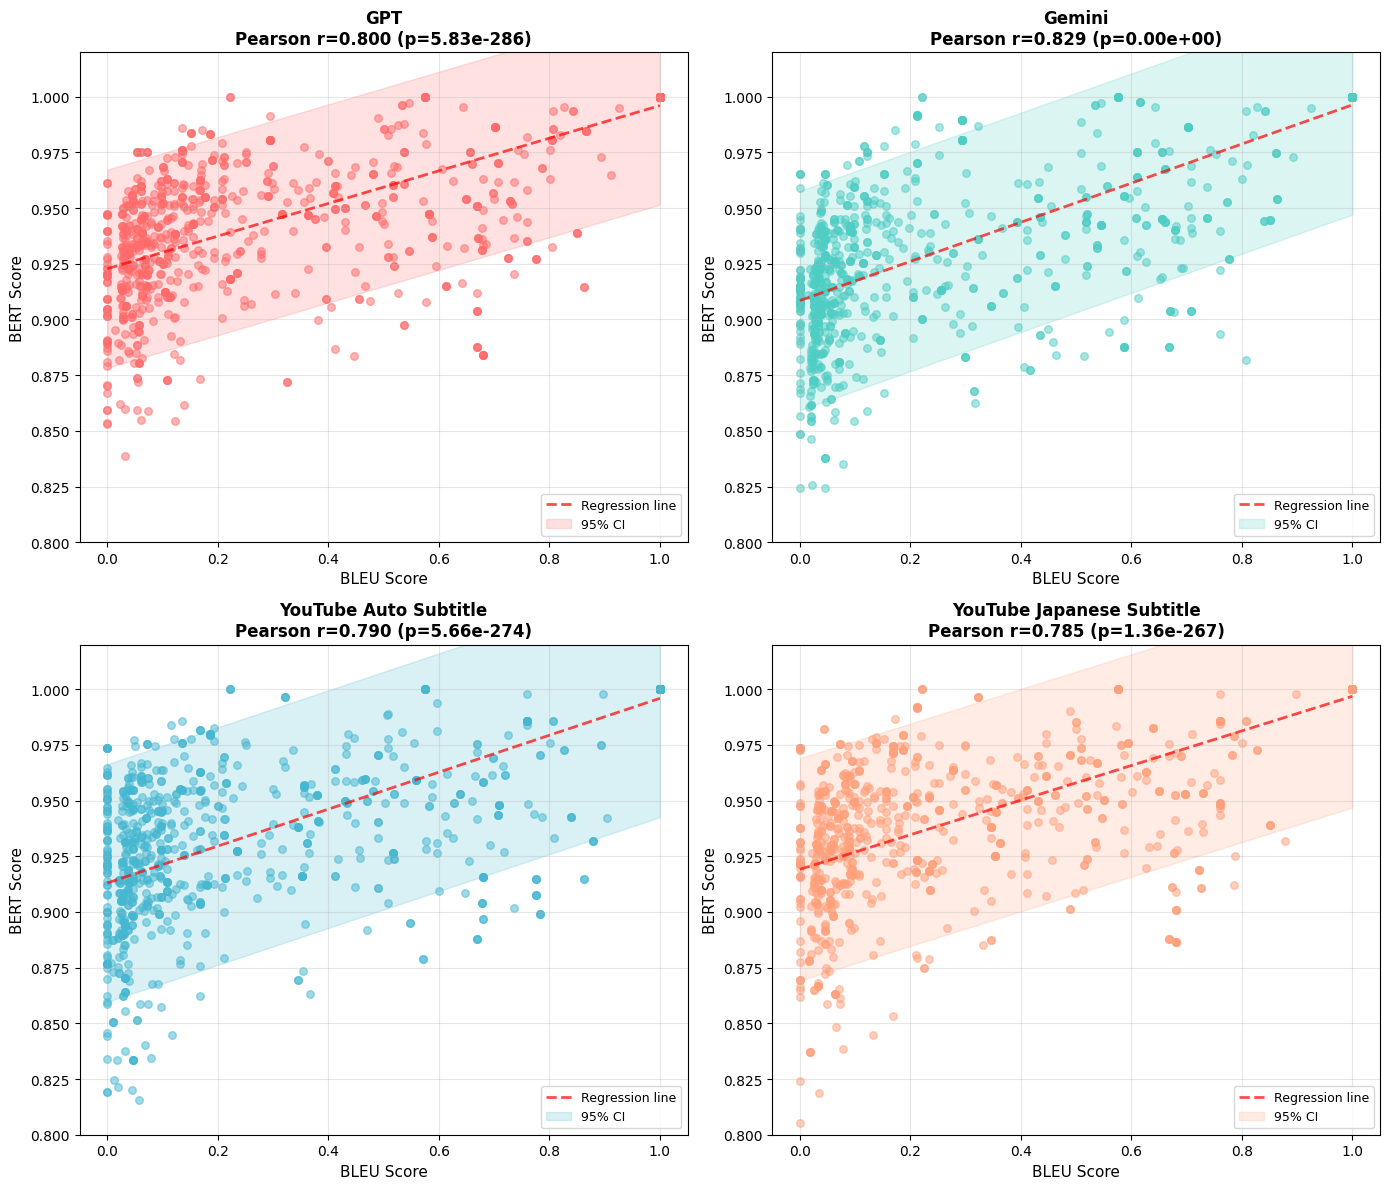


信頼性検定結果サマリー
                   Method  Sample_Size  Pearson_r     Pearson_p  R_squared  Spearman_rho    Spearman_p  Regression_slope  Regression_p  Residual_std  Shapiro_stat    Shapiro_p  Levene_stat      Levene_p  Outliers_count  Outliers_pct  BLEU_variance  BERT_variance  Variance_ratio
                      GPT         1280   0.800127 5.829349e-286   0.640204      0.826408 4.486116e-321          0.073229 5.829349e-286      0.022700      0.891164 4.038162e-29   367.147300 1.080591e-126               1      0.078125       0.170850       0.001431      119.386829
                   Gemini         1280   0.828715  0.000000e+00   0.686769      0.836259  0.000000e+00          0.087843  0.000000e+00      0.025121      0.917605 7.870573e-26   384.254229 2.271281e-131               1      0.078125       0.179176       0.002013       89.001461
    YouTube Auto Subtitle         1280   0.790145 5.663996e-274   0.624329      0.813145 1.168521e-302          0.082891 5.663996e-274      0.027224  

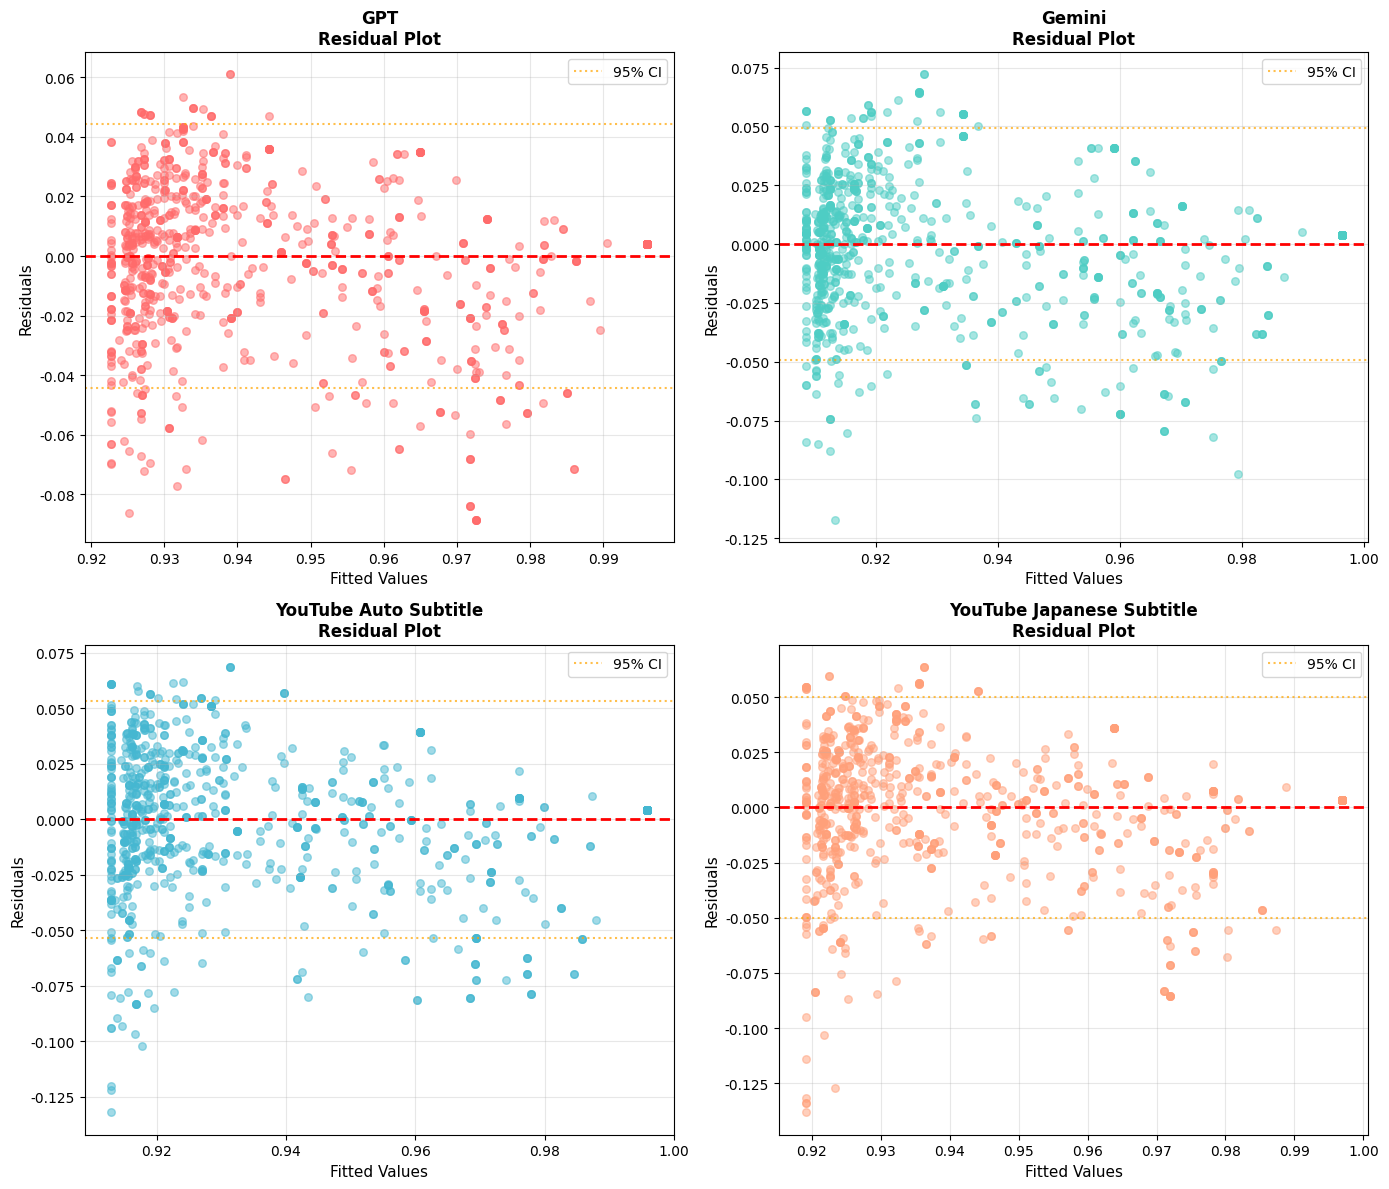


残差プロットを residual_plots.png に保存しました


In [8]:
# ========================================
# 5. 視覚化
# ========================================

# 5-1. BLEU/BERTスコアの比較（箱ひげ図）
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# BLEUスコア
bleu_data = [method_dataframes[method]['BLEU'] for method in translation_methods]
axes[0].boxplot(bleu_data, labels=['GPT', 'Gemini', 'YT Auto', 'YT JP'])
axes[0].set_title('BLEU Score Comparison', fontsize=14, fontweight='bold')
axes[0].set_ylabel('BLEU Score')
axes[0].grid(True, alpha=0.3)

# BERTスコア
bert_data = [method_dataframes[method]['BERT'] for method in translation_methods]
axes[1].boxplot(bert_data, labels=['GPT', 'Gemini', 'YT Auto', 'YT JP'])
axes[1].set_title('BERT Score Comparison', fontsize=14, fontweight='bold')
axes[1].set_ylabel('BERT Score')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('score_comparison_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()

# 5-2. 翻訳戦略の使用頻度比較
fig, ax = plt.subplots(figsize=(12, 6))

strategies = ['As it was', 'Literal translation', 'Omission', 'Addition', 'Replacement']
x = np.arange(len(strategies))
width = 0.2

for i, method in enumerate(translation_methods):
    counts = [all_strategy_counts[method][strategy] for strategy in strategies]
    percentages = [(count / len(method_dataframes[method])) * 100 for count in counts]
    ax.bar(x + i*width, percentages, width, label=method.replace(' ', '\n'))

ax.set_xlabel('Translation Strategy', fontsize=12)
ax.set_ylabel('Percentage (%)', fontsize=12)
ax.set_title('Translation Strategy Usage by Method', fontsize=14, fontweight='bold')
ax.set_xticks(x + width * 1.5)
ax.set_xticklabels(strategies, rotation=15, ha='right')
ax.legend()
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('strategy_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# 5-3. 翻訳戦略別スコア（ヒートマップ）
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

strategies_col = ['As_it_was', 'Literal_translation', 'Omission', 'Addition', 'Replacement']

# BLEU用のデータ作成
bleu_heatmap_data = []
bert_heatmap_data = []

for method in translation_methods:
    bleu_row = []
    bert_row = []
    df = method_dataframes[method]

    for strategy in strategies_col:
        strategy_data = df[df[strategy] == 1]
        if len(strategy_data) > 0:
            bleu_row.append(strategy_data['BLEU'].mean())
            bert_row.append(strategy_data['BERT'].mean())
        else:
            bleu_row.append(0)
            bert_row.append(0)

    bleu_heatmap_data.append(bleu_row)
    bert_heatmap_data.append(bert_row)

# BLEUヒートマップ
sns.heatmap(bleu_heatmap_data, annot=True, fmt='.3f', cmap='YlOrRd',
            xticklabels=['As it was', 'Literal', 'Omission', 'Addition', 'Replacement'],
            yticklabels=['GPT', 'Gemini', 'YT Auto', 'YT JP'],
            ax=axes[0], cbar_kws={'label': 'BLEU Score'})
axes[0].set_title('BLEU Score by Translation Strategy and Method', fontsize=14, fontweight='bold')

# BERTヒートマップ
sns.heatmap(bert_heatmap_data, annot=True, fmt='.3f', cmap='YlGnBu',
            xticklabels=['As it was', 'Literal', 'Omission', 'Addition', 'Replacement'],
            yticklabels=['GPT', 'Gemini', 'YT Auto', 'YT JP'],
            ax=axes[1], cbar_kws={'label': 'BERT Score'})
axes[1].set_title('BERT Score by Translation Strategy and Method', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('strategy_score_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

# ========================================
# 5-4. 散布図（BLEU vs BERT）+ 信頼性検定
# ========================================

fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.flatten()

colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A']

print("\n" + "="*60)
print("散布図の分散と信頼性検定")
print("="*60)

# 各手法の信頼性統計を格納
reliability_results = []

for i, method in enumerate(translation_methods):
    df = method_dataframes[method]

    # データポイントをプロット
    axes[i].scatter(df['BLEU'], df['BERT'], alpha=0.5, c=colors[i], s=30)

    # ========================================
    # 信頼性検定の追加
    # ========================================

    # 1. 相関係数と有意性検定
    corr, p_value_corr = stats.pearsonr(df['BLEU'], df['BERT'])

    # 2. 決定係数（R²）
    r_squared = corr ** 2

    # 3. スピアマンの順位相関（非線形関係の検出）
    spearman_corr, p_value_spearman = stats.spearmanr(df['BLEU'], df['BERT'])

    # 4. 線形回帰と残差分析
    from scipy.stats import linregress
    slope, intercept, r_value, p_value_reg, std_err = linregress(df['BLEU'], df['BERT'])

    # 回帰直線を描画
    x_line = np.linspace(df['BLEU'].min(), df['BLEU'].max(), 100)
    y_line = slope * x_line + intercept
    axes[i].plot(x_line, y_line, 'r--', linewidth=2, alpha=0.7, label='Regression line')

    # 95%信頼区間を計算して描画
    predict_y = slope * df['BLEU'] + intercept
    residuals = df['BERT'] - predict_y
    residual_std = np.sqrt(np.sum(residuals**2) / (len(df) - 2))

    # 標準誤差による信頼区間
    ci = 1.96 * residual_std  # 95%信頼区間
    axes[i].fill_between(x_line, y_line - ci, y_line + ci,
                         color=colors[i], alpha=0.2, label='95% CI')

    # 5. 残差の正規性検定（Shapiro-Wilk検定）
    shapiro_stat, p_value_shapiro = stats.shapiro(residuals)

    # 6. 分散の均一性検定（Levene検定用にグループ分け）
    # BLEUスコアを3つのグループに分割
    df_sorted = df.sort_values('BLEU')
    n = len(df_sorted)
    group_size = n // 3
    group1 = df_sorted['BERT'].iloc[:group_size]
    group2 = df_sorted['BERT'].iloc[group_size:2*group_size]
    group3 = df_sorted['BERT'].iloc[2*group_size:]
    levene_stat, p_value_levene = stats.levene(group1, group2, group3)

    # 7. 外れ値の検出（Zスコア法）
    from scipy.stats import zscore
    z_scores_bleu = np.abs(zscore(df['BLEU']))
    z_scores_bert = np.abs(zscore(df['BERT']))
    outliers = ((z_scores_bleu > 3) | (z_scores_bert > 3)).sum()
    outlier_percentage = (outliers / len(df)) * 100

    # 8. 分散比（VIF: Variance Inflation Factor の簡易版）
    bleu_variance = df['BLEU'].var()
    bert_variance = df['BERT'].var()
    variance_ratio = bleu_variance / bert_variance if bert_variance != 0 else np.inf

    # グラフのタイトルと凡例
    axes[i].set_xlabel('BLEU Score', fontsize=11)
    axes[i].set_ylabel('BERT Score', fontsize=11)
    axes[i].set_title(f'{method}\nPearson r={corr:.3f} (p={p_value_corr:.2e})',
                     fontsize=12, fontweight='bold')
    axes[i].legend(loc='lower right', fontsize=9)
    axes[i].grid(True, alpha=0.3)
    axes[i].set_xlim(-0.05, 1.05)
    axes[i].set_ylim(0.8, 1.02)

    # 結果を保存
    reliability_results.append({
        'Method': method,
        'Sample_Size': len(df),
        'Pearson_r': corr,
        'Pearson_p': p_value_corr,
        'R_squared': r_squared,
        'Spearman_rho': spearman_corr,
        'Spearman_p': p_value_spearman,
        'Regression_slope': slope,
        'Regression_p': p_value_reg,
        'Residual_std': residual_std,
        'Shapiro_stat': shapiro_stat,
        'Shapiro_p': p_value_shapiro,
        'Levene_stat': levene_stat,
        'Levene_p': p_value_levene,
        'Outliers_count': outliers,
        'Outliers_pct': outlier_percentage,
        'BLEU_variance': bleu_variance,
        'BERT_variance': bert_variance,
        'Variance_ratio': variance_ratio
    })

    # コンソールに詳細を出力
    print(f"\n■ {method} の信頼性分析:")
    print(f"  サンプルサイズ: {len(df)}")
    print(f"  Pearson相関係数: r={corr:.4f}, p={p_value_corr:.4e} {'***' if p_value_corr < 0.001 else '**' if p_value_corr < 0.01 else '*' if p_value_corr < 0.05 else 'n.s.'}")
    print(f"  決定係数: R²={r_squared:.4f} ({r_squared*100:.1f}% の分散を説明)")
    print(f"  Spearman順位相関: ρ={spearman_corr:.4f}, p={p_value_spearman:.4e}")
    print(f"  回帰式: BERT = {slope:.4f} × BLEU + {intercept:.4f}")
    print(f"  残差標準偏差: {residual_std:.4f}")
    print(f"  残差の正規性(Shapiro-Wilk): W={shapiro_stat:.4f}, p={p_value_shapiro:.4e} {'正規分布' if p_value_shapiro > 0.05 else '非正規'}")
    print(f"  分散の均一性(Levene): F={levene_stat:.4f}, p={p_value_levene:.4e} {'均一' if p_value_levene > 0.05 else '不均一'}")
    print(f"  外れ値: {outliers}個 ({outlier_percentage:.1f}%)")
    print(f"  BLEU分散: {bleu_variance:.4f}")
    print(f"  BERT分散: {bert_variance:.4f}")
    print(f"  分散比(BLEU/BERT): {variance_ratio:.4f}")

    # 信頼性の総合評価
    reliability_score = 0
    if p_value_corr < 0.001: reliability_score += 3
    elif p_value_corr < 0.01: reliability_score += 2
    elif p_value_corr < 0.05: reliability_score += 1

    if r_squared > 0.7: reliability_score += 3
    elif r_squared > 0.5: reliability_score += 2
    elif r_squared > 0.3: reliability_score += 1

    if p_value_shapiro > 0.05: reliability_score += 2
    if p_value_levene > 0.05: reliability_score += 2
    if outlier_percentage < 5: reliability_score += 2

    max_score = 12
    reliability_pct = (reliability_score / max_score) * 100

    print(f"  📊 信頼性スコア: {reliability_score}/{max_score} ({reliability_pct:.1f}%)")

    if reliability_pct >= 75:
        print(f"  ✅ 評価: 高い信頼性 - この散布図は非常に信頼できます")
    elif reliability_pct >= 50:
        print(f"  ⚠️  評価: 中程度の信頼性 - 注意して解釈する必要があります")
    else:
        print(f"  ❌ 評価: 低い信頼性 - 慎重な解釈が必要です")

plt.tight_layout()
plt.savefig('bleu_bert_correlation_with_CI.png', dpi=300, bbox_inches='tight')
plt.show()

# ========================================
# 信頼性結果のデータフレーム化とエクスポート
# ========================================

reliability_df = pd.DataFrame(reliability_results)

print("\n" + "="*60)
print("信頼性検定結果サマリー")
print("="*60)
print(reliability_df.to_string(index=False))

# CSV出力
reliability_df.to_csv('scatter_reliability_analysis.csv', index=False)
print("\n信頼性分析結果を scatter_reliability_analysis.csv に保存しました")

# ========================================
# 追加の視覚化：残差プロット
# ========================================

fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.flatten()

for i, method in enumerate(translation_methods):
    df = method_dataframes[method]

    # 回帰分析
    slope, intercept, _, _, _ = linregress(df['BLEU'], df['BERT'])
    predict_y = slope * df['BLEU'] + intercept
    residuals = df['BERT'] - predict_y

    # 残差プロット
    axes[i].scatter(predict_y, residuals, alpha=0.5, c=colors[i], s=30)
    axes[i].axhline(y=0, color='r', linestyle='--', linewidth=2)
    axes[i].set_xlabel('Fitted Values', fontsize=11)
    axes[i].set_ylabel('Residuals', fontsize=11)
    axes[i].set_title(f'{method}\nResidual Plot', fontsize=12, fontweight='bold')
    axes[i].grid(True, alpha=0.3)

    # 95%信頼区間のバンドを追加
    residual_std = np.sqrt(np.sum(residuals**2) / (len(df) - 2))
    axes[i].axhline(y=1.96*residual_std, color='orange', linestyle=':', linewidth=1.5, alpha=0.7, label='95% CI')
    axes[i].axhline(y=-1.96*residual_std, color='orange', linestyle=':', linewidth=1.5, alpha=0.7)
    axes[i].legend()

plt.tight_layout()
plt.savefig('residual_plots.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n残差プロットを residual_plots.png に保存しました")

In [9]:
# ========================================
# 6. 統計的検定
# ========================================

print("\n" + "="*60)
print("統計的検定結果")
print("="*60)

# BLEUスコアの分散分析（ANOVA）
bleu_groups = [method_dataframes[method]['BLEU'] for method in translation_methods]
f_stat_bleu, p_value_bleu = stats.f_oneway(*bleu_groups)
print(f"\nBLEUスコアのANOVA:")
print(f"F統計量: {f_stat_bleu:.4f}")
print(f"p値: {p_value_bleu:.4e}")
print(f"結果: {'有意差あり' if p_value_bleu < 0.05 else '有意差なし'} (α=0.05)")

# BERTスコアの分散分析
bert_groups = [method_dataframes[method]['BERT'] for method in translation_methods]
f_stat_bert, p_value_bert = stats.f_oneway(*bert_groups)
print(f"\nBERTスコアのANOVA:")
print(f"F統計量: {f_stat_bert:.4f}")
print(f"p値: {p_value_bert:.4e}")
print(f"結果: {'有意差あり' if p_value_bert < 0.05 else '有意差なし'} (α=0.05)")

# ペアワイズt検定
print("\n■ ペアワイズt検定（BERT スコア）:")
from itertools import combinations

for method1, method2 in combinations(translation_methods, 2):
    data1 = method_dataframes[method1]['BERT']
    data2 = method_dataframes[method2]['BERT']
    t_stat, p_value = stats.ttest_ind(data1, data2)
    print(f"{method1} vs {method2}: t={t_stat:.3f}, p={p_value:.4e}")


統計的検定結果

BLEUスコアのANOVA:
F統計量: 2.0053
p値: 1.1098e-01
結果: 有意差なし (α=0.05)

BERTスコアのANOVA:
F統計量: 13.8509
p値: 5.4079e-09
結果: 有意差あり (α=0.05)

■ ペアワイズt検定（BERT スコア）:
GPT vs Gemini: t=5.430, p=6.1796e-08
GPT vs YouTube Auto Subtitle: t=4.077, p=4.7043e-05
GPT vs YouTube Japanese Subtitle: t=0.479, p=6.3219e-01
Gemini vs YouTube Auto Subtitle: t=-1.281, p=2.0038e-01
Gemini vs YouTube Japanese Subtitle: t=-4.799, p=1.6831e-06
YouTube Auto Subtitle vs YouTube Japanese Subtitle: t=-3.490, p=4.9121e-04


In [10]:
# ========================================
# 7. 結果のエクスポート
# ========================================

# 各手法のデータフレームをCSVで保存
for method, df in method_dataframes.items():
    filename = f"{method.replace(' ', '_')}_analysis.csv"
    df.to_csv(filename, index=False)
    print(f"\n{method} のデータを {filename} に保存しました")

# 比較結果も保存
comparison_df.to_csv('method_comparison_summary.csv', index=False)
print("\n比較結果を method_comparison_summary.csv に保存しました")

print("\n" + "="*60)
print("分析完了！")
print("="*60)


GPT のデータを GPT_analysis.csv に保存しました

Gemini のデータを Gemini_analysis.csv に保存しました

YouTube Auto Subtitle のデータを YouTube_Auto_Subtitle_analysis.csv に保存しました

YouTube Japanese Subtitle のデータを YouTube_Japanese_Subtitle_analysis.csv に保存しました

比較結果を method_comparison_summary.csv に保存しました

分析完了！


In [12]:
import os
import shutil

# Google Driveのルートパス
drive_path = '/content/drive/MyDrive/thesis'

# 保存先のフォルダ名
output_folder = 'Analysis_Results'
output_path = os.path.join(drive_path, output_folder)

# フォルダが存在しない場合は作成
os.makedirs(output_path, exist_ok=True)
print(f"出力フォルダ: {output_path}")

# 保存するファイルリスト
files_to_copy = [
    'score_comparison_boxplot.png',
    'strategy_comparison.png',
    'strategy_score_heatmap.png',
    'bleu_bert_correlation_with_Cl.png',
    'residual_plots.png',
    'scatter_reliability_analysis.csv',
    'GPT_analysis.csv',
    'Gemini_analysis.csv',
    'YouTube_Auto_Subtitle_analysis.csv',
    'YouTube_Japanese_Subtitle_analysis.csv',
    'method_comparison_summary.csv'
]

# ファイルをGoogle Driveにコピー
print("\nファイルをGoogle Driveにコピー中...")
for filename in files_to_copy:
    try:
        shutil.copy(filename, output_path)
        print(f"- {filename} をコピーしました。")
    except FileNotFoundError:
        print(f"- {filename} が見つかりませんでした。スキップします。")
    except Exception as e:
        print(f"- {filename} のコピー中にエラーが発生しました: {e}")

print("\nすべてのファイルのコピーが完了しました。")

出力フォルダ: /content/drive/MyDrive/thesis/Analysis_Results

ファイルをGoogle Driveにコピー中...
- score_comparison_boxplot.png をコピーしました。
- strategy_comparison.png をコピーしました。
- strategy_score_heatmap.png をコピーしました。
- bleu_bert_correlation_with_Cl.png が見つかりませんでした。スキップします。
- residual_plots.png をコピーしました。
- scatter_reliability_analysis.csv をコピーしました。
- GPT_analysis.csv をコピーしました。
- Gemini_analysis.csv をコピーしました。
- YouTube_Auto_Subtitle_analysis.csv をコピーしました。
- YouTube_Japanese_Subtitle_analysis.csv をコピーしました。
- method_comparison_summary.csv をコピーしました。

すべてのファイルのコピーが完了しました。
